## Comparison Face detection methods (MTCNN, dlib HOG and opencv HAARCASCADE)

In [1]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
import dlib
import cv2

Using TensorFlow backend.


In [2]:
# MTCNN
detector_mtcnn = MTCNN()

def face_detection_mtcnn(image):
    faces = detector_mtcnn.detect_faces(image)
    # print("Number of faces detected:",len(faces))

    for face in faces:
        left, top, width, height = face['box']
        right, bottom = left + width, top + height
        cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 0), 2)
    
    # plt.imshow(image)
    # plt.show()
    
    return image

In [3]:
# dlib HOG
detector_hog = dlib.get_frontal_face_detector()

def face_detection_hog(image):
    if image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    faces = detector_hog(gray, 0)
    # print("Number of faces detected: {}".format(len(faces)))

    for face in faces:
        top, right, bottom, left = face.top(),face.right(),face.bottom(),face.left()
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

    # plt.imshow(image)
    # plt.show()
    
    return image

In [4]:
# opencv Haarcascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def face_detection_haarcascade(image):
    if image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    faces = face_cascade.detectMultiScale(gray)
    # print("Number of faces detected:",len(faces))

    for (x,y,w,h) in faces:
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)

    # plt.imshow(image)
    # plt.show()
    
    return image

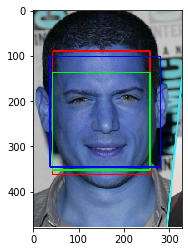

In [5]:
path_image = "Michael Scofield.png"
image = cv2.imread(path_image)
# image = imutils.resize(image, width=500)

image = face_detection_mtcnn(image)
image = face_detection_hog(image)
image = face_detection_haarcascade(image)

plt.imshow(image)
plt.show()

In [6]:
# create a videoCapture object with a video file or a capture device
cap = cv2.VideoCapture('Ladykracher.mp4')

# check if we will successfully open the file
if not cap.isOpened():
    print("Error opening the file.")
    assert(False)

# # Default resolutions of the frame are obtained.The default resolutions are system dependent.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# # Define the codec and create VideoWriter object.The output is stored in 'output.mp4' file.
# out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

# read until the end of the video frame by frame
while cap.isOpened():

    # cap.read (): decodes and returns the next video frame
    # variable ret: will get the return value by retrieving the camera frame, true or false (via "cap")
    # variable frame: will get the next image of the video (via "cap")
    ret, frame = cap.read()

    if ret:
        # frame = cv2.resize(frame, (500,500))
        frame = face_detection_mtcnn(frame)
        frame = face_detection_hog(frame)
        frame = face_detection_haarcascade(frame)
        
        
        cv2.putText(frame, "MTCNN:", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        cv2.putText(frame, "---", (100, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 4)
        
        cv2.putText(frame, "HOG:", (10, 60),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        cv2.putText(frame, "---", (100, 60),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 4)
        
        cv2.putText(frame, "HAAR:", (10, 90),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        cv2.putText(frame, "---", (100, 90),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 4)
        
        cv2.putText(frame, "Ayoub Ridouani", (frame_width-200, frame_height-30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
        
        # to display the frame
        cv2.imshow("Output", frame)
        
        # Write the frame into the file 'output.avi'
        # out.write(frame)

        # waitKey (0): put the screen in pause because it will wait infinitely that key
        # waitKey (n): will wait for keyPress for only n milliseconds and continue to refresh and read the video frame using cap.read ()
        # ord (character): returns an integer representing the Unicode code point of the given Unicode character.
        if cv2.waitKey(1) == ord('e'):
            break
    else:
        break

# to release software and hardware resources
cap.release()
# out.release()

# to close all windows in imshow ()
cv2.destroyAllWindows()